# Introduction

In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob
import zipfile

In [2]:
# trying to unzip the files

files = glob.glob("./data/2021/*.zip")

for file in files:
    print("Unzipping: ", file)
    
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('./data/raw_2021')

Unzipping:  ./data/2021/202107-divvy-tripdata.zip
Unzipping:  ./data/2021/202109-divvy-tripdata.zip
Unzipping:  ./data/2021/202104-divvy-tripdata.zip
Unzipping:  ./data/2021/202112-divvy-tripdata.zip
Unzipping:  ./data/2021/202102-divvy-tripdata.zip
Unzipping:  ./data/2021/202101-divvy-tripdata.zip
Unzipping:  ./data/2021/202111-divvy-tripdata.zip
Unzipping:  ./data/2021/202110-divvy-tripdata.zip
Unzipping:  ./data/2021/202103-divvy-tripdata.zip
Unzipping:  ./data/2021/202108-divvy-tripdata.zip
Unzipping:  ./data/2021/202105-divvy-tripdata.zip
Unzipping:  ./data/2021/202106-divvy-tripdata.zip


In [3]:
# df_202004 = pd.read_csv("./data/raw/202004-divvy-tripdata.csv")

In [4]:
path = r"./data/raw_2021"
all_files = glob.glob(os.path.join(path, "*.csv"))

# sorted(all_files)
df = pd.concat((pd.read_csv(f) for f in sorted(all_files)), ignore_index=True)

In [5]:
# null values

# df.isnull().sum().value_counts()
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [7]:
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5595063,5595063,5595063,5595063,4904254,4904257,4855893,4855893,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06,5595063
unique,5595063,3,4677998,4671372,847,834,844,832,NaN,NaN,NaN,NaN,2
top,E19E6F1B8D4C42ED,classic_bike,2021-07-16 16:59:57,2021-09-16 08:39:10,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,3251028,7,17,82715,82715,83390,83390,NaN,NaN,NaN,NaN,3066058
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01,NaN


In [8]:
# How many percent of the data contain null values?

(739170/len(df)) * 100

13.211111295797743

About 13% of the data contains null values - based on the highest number.

<AxesSubplot: >

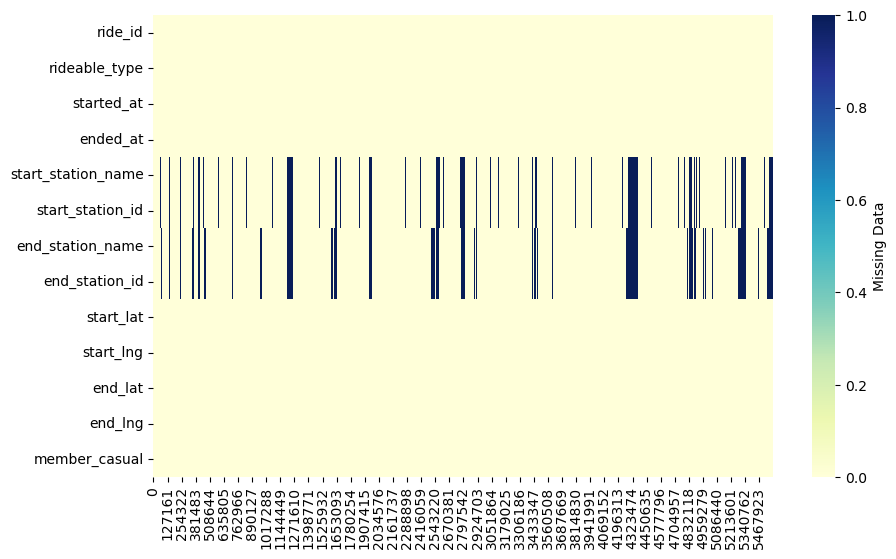

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

## Data Cleaning

From the above data visualization on the null values, we can see that most of the null values are found in the start and end stations - both names and id.
Hence, as without either of them, we are unable to determine how long the bike travelled, these values will be dropped.

In [10]:
# Dropping of null values
df_clean = df.dropna(how='any')
df_clean.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

## Feature Engineering

In [11]:
# Creation of distance

# Vectorized numpy version 

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return round(km,2)

In [12]:
df_clean['distance'] = haversine_np(df_clean['start_lng'],df_clean['start_lat'],df_clean['end_lng'],df_clean['end_lat'])

/var/folders/rl/nv478tkn6ggfb1dvdybsqq7c0000gn/T/ipykernel_35714/3551193690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['distance'] = haversine_np(df_clean['start_lng'],df_clean['start_lat'],df_clean['end_lng'],df_clean['end_lat'])


In [13]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.03
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.11
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.03
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.03
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.03


In [14]:
df_clean['distance'].value_counts()

0.00     297235
1.02      29341
1.37      25188
1.32      24398
1.22      23042
          ...  
31.89         1
23.10         1
25.26         1
17.13         1
20.83         1
Name: distance, Length: 2177, dtype: int64

As seen from the above values, there are some data with 0 distance. These values will be dropped as it could be:
* People trying/experimenting with the system
* Change of mind after starting the bike rides

In [15]:
df_clean = df_clean[df_clean['distance'] != 0.00]
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.03
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.11
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.03
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.03
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.03


In [32]:
df_clean['distance'].describe().apply(lambda x: format(x, '.2f'))

count    4291067.00
mean           2.27
std            1.85
min            0.01
25%            1.03
50%            1.72
75%            2.92
max           33.78
Name: distance, dtype: object

In [16]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.03
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.11
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.03
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.03
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.03


In [24]:
# Creation of time difference

df_clean_copy = df_clean.copy()

df_clean_copy['started_at'] = pd.to_datetime(df_clean_copy['started_at'])

In [25]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291067 entries, 9 to 5595062
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  distance            float64       
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 491.1+ MB
